MOVING AVERAGE MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

In [2]:
df=pd.read_csv('DDFO.csv',delimiter=';')
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


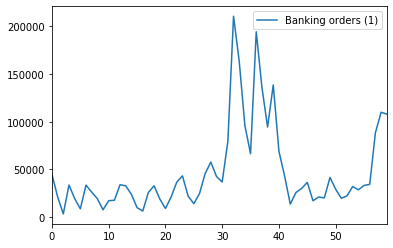

In [3]:
BO_1=df.filter(['Banking orders (1)'])
BO_1.plot()

In [4]:
def stationarityCheck(var):
    check = adfuller(var)
    print('ADF stat : %f' % check[0])
    print('p-value : %f' % check[1])
    print('Critical Values :')
    for key, val in check[4].items():
        print('%s : %.3f' % (key, val))

In [5]:
stationarityCheck(BO_1.values)

ADF stat : -1.798339
p-value : 0.381287
Critical Values :
1% : -3.551
5% : -2.914
10% : -2.595


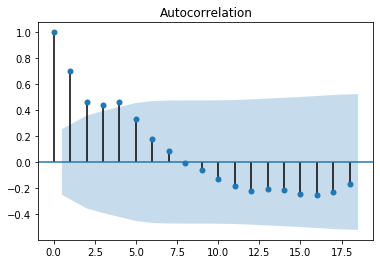

In [6]:
plot_acf(BO_1);

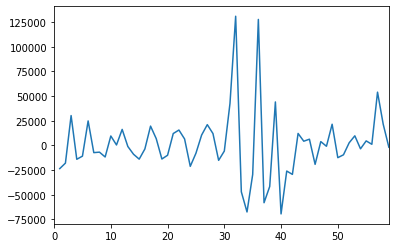

In [7]:
BO_1['FDiff']=BO_1['Banking orders (1)'].diff()
BO_1['FDiff'].plot()

In [8]:
BO_1.dropna(inplace=True)
stationarityCheck(BO_1['FDiff'].values)

ADF stat : -8.333176
p-value : 0.000000
Critical Values :
1% : -3.551
5% : -2.914
10% : -2.595


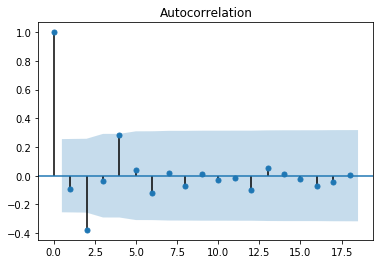

In [9]:
plot_acf(BO_1['FDiff']);

In [10]:
period=10
X = BO_1['FDiff']
train = X[1:len(X)-period]
test = X[len(X)-period:]

In [11]:
model = ARMA(X, order=(0,2))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train)+1,end=len(train) + len(test),dynamic=False)
model_fit.summary()

C:\Users\m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  FDiff   No. Observations:                   59
Model:                     ARMA(0, 2)   Log Likelihood                -694.876
Method:                       css-mle   S.D. of innovations          31467.005
Date:                Mon, 05 Apr 2021   AIC                           1397.751
Time:                        14:03:06   BIC                           1406.062
Sample:                             0   HQIC                          1400.995
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         991.1984   2305.028      0.430      0.667   -3526.574    5508.970
ma.L1.FDiff    -0.1625      0.122     -1.333      0.182      -0.401       0.076
ma.L2.FDiff    -0.2880      0.114     -2.535      0.011      -0.511      -0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.6025           +0.0000j            1.6025            0.0000
MA.2           -2.1667           +0.0000j            2.1667            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
compare = pd.concat([predictions.rename('Diffrenced Predictions'),
                     BO_1['Banking orders (1)'].rename('Actual'),
                     BO_1['FDiff'].rename('First Difference')], axis=1)

In [13]:
compare['Predictions'] = compare['Diffrenced Predictions'] + compare['Actual'].shift(1)

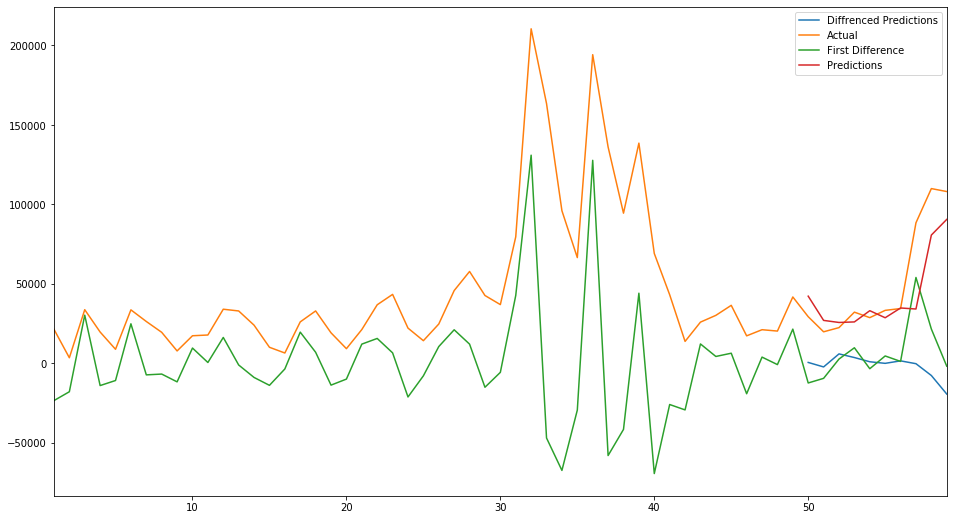

In [14]:
compare.plot(figsize=(16, 9))

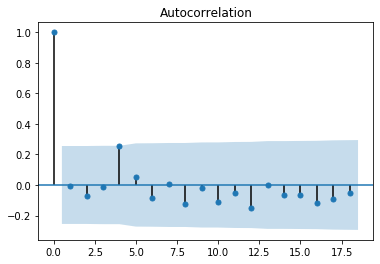

In [15]:
plot_acf(model_fit.resid);

Better model | Upper & Lower Bound | Ljung–Box test on residuals | Move forward

In [16]:
df=pd.read_csv('sales.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [17]:
df["date"]=pd.to_datetime(df["date"], format="%Y-%m-%d")
df.set_index("date", inplace=True)

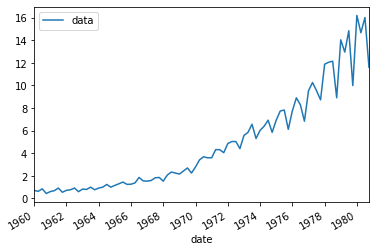

In [18]:
df.plot()

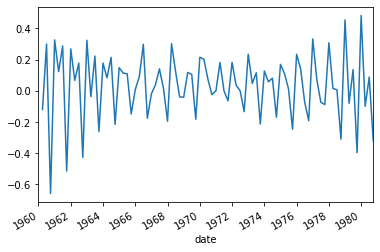

In [19]:
df['LDiff']=(np.log(df['data'])).diff()
df['LDiff'].plot()

In [20]:
df.dropna(inplace=True)
stationarityCheck(df['LDiff'].values)

ADF stat : -4.317044
p-value : 0.000415
Critical Values :
1% : -3.518
5% : -2.900
10% : -2.587


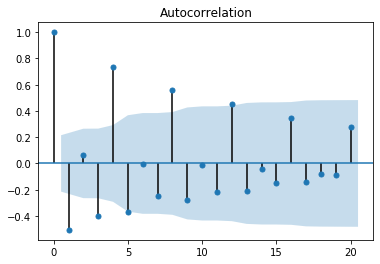

In [21]:
plot_acf(df['LDiff']);

In [22]:
period=12
X = df['LDiff']
train = X[1:len(X)-period]
test = X[len(X)-period:]

In [23]:
model = ARMA(X, order=(0,8))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train)+1,end=len(train) + len(test),dynamic=False)
model_fit.summary()

C:\Users\m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\m\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\m\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  LDiff   No. Observations:                   83
Model:                     ARMA(0, 8)   Log Likelihood                  69.784
Method:                       css-mle   S.D. of innovations              0.096
Date:                Mon, 05 Apr 2021   AIC                           -119.568
Time:                        14:04:29   BIC                            -95.380
Sample:                             0   HQIC                          -109.851
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0353      0.010      3.663      0.000       0.016       0.054
ma.L1.LDiff    -0.6509      0.059    -11.112      0.000      -0.766      -0.536
ma.L2.LDiff    -0.0750      0.113     -0.666      0.505      -0.296       0.146
ma.L3.LDiff    -0.5380      0.134     -4.007      0.000      -0.801      -0.275
ma.L4.LDiff     1.3032      0.111     11.750      0.000       1.086       1.521
ma.L5.LDiff    -0.2395      0.120     -2.000      0.045      -0.474      -0.005
ma.L6.LDiff    -0.1528      0.113     -1.356      0.175      -0.374       0.068
ma.L7.LDiff    -0.2986      0.126     -2.369      0.018      -0.546      -0.052
ma.L8.LDiff     0.6001      0.084      7.165      0.000       0.436       0.764
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.5095           -0.8606j            1.0001           -0.3351
MA.2           -0.5095           +0.8606j            1.0001            0.3351
MA.3           -0.9062           -0.7156j            1.1547           -0.3936
MA.4           -0.9062           +0.7156j            1.1547            0.3936
MA.5            0.9171           -0.4012j            1.0011           -0.0656
MA.6            0.9171           +0.4012j            1.0011            0.0656
MA.7            0.7474           -0.8297j            1.1167           -0.1333
MA.8            0.7474           +0.8297j            1.1167            0.1333
-----------------------------------------------------------------------------
"""

In [24]:
compare = pd.concat([predictions.rename('LDiffrenced Predictions'),
                     df['data'].rename('Actual'),
                     df['LDiff'].rename('Log Difference')], axis=1)

In [25]:
compare['Predictions'] = np.exp((compare['LDiffrenced Predictions'] + (np.log(compare['Actual'])).shift(1)))
#compare['inv'] = np.exp((compare['Log Difference'] + (np.log(compare['Actual'])).shift(1)))

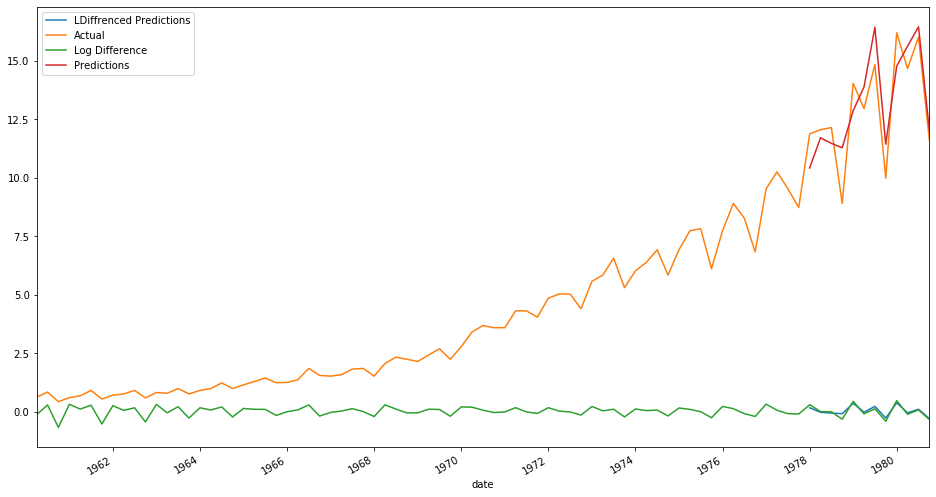

In [26]:
compare.plot(figsize=(16, 9))

In [27]:
rmse=((compare['Predictions']-compare['Actual'])**2).mean()**0.5
rmse

1.2423667450884586

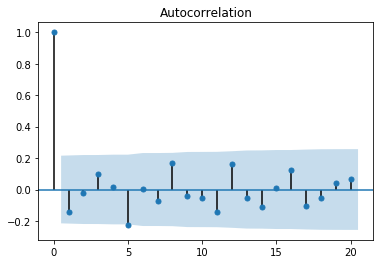

In [28]:
plot_acf(model_fit.resid);

------------------------------------------

Different difference | Different lags | Upper & Lower Bound | Ljung–Box test on residuals | Move forward

------------------------------------------